## Importando as bibliotecas necessárias:

In [102]:
# Importando as bilbiotecas:
import numpy as np
import matplotlib.pyplot as plt

# Importando as bibliotecas Scikit-Learn:
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Importando as bibliotecas do scikit learn:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Importando bilbioteca mágica
%matplotlib inline

## Definindo e plotando o dataset:

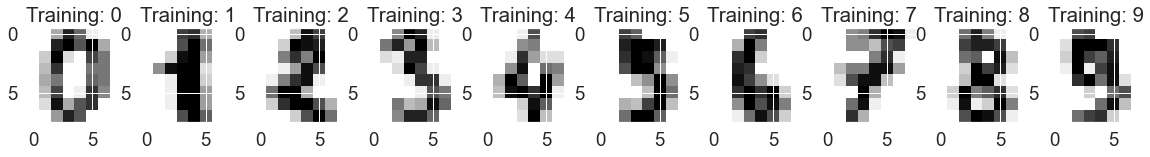

In [103]:
# Instanciando os digitos:
digits = load_digits()

# Plotando os digitos:
plt.figure(figsize=(20, 5))

# Loop
for i in range(0, 10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[i])
plt.show()

In [104]:
# Definindo o número de exemplos:
n_samples = len(digits.images)

# Integrando e formatando o dataset:
data = digits.images.reshape((n_samples, -1))

## Separação em teste e treinamento:

In [105]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2,random_state=42)

## Definição do GridSearchCV

#### Biblioteca em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [106]:
# Definindo os parâmetros
param =[{'weights':['uniform', 'distance'],'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                                          15, 20, 25, 30, 35, 40, 45, 50,
                                                         100, 200, 300, 400, 500, 600]}]

# Instanciando o classificador k-NN:
clf = KNeighborsClassifier()

# Instânciando o GridSearchCV:
gridsearchcv = GridSearchCV(clf, param, cv=5, verbose=3, n_jobs=-1)

# Efetuando o treinamento do modelo;
gridsearchcv.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 30, 35, 40, 45, 50, 100, 200, 300,
                                          400, 500, 600],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

# Imprimindo os valores encontrados:

In [107]:
print('O melhor parâmetro encontrado foi: {}'.format(gridsearchcv.best_params_))
print('A melhor probabilidade encontrada foi: {:.2f}%'.format(gridsearchcv.best_score_* 100))

O melhor parâmetro encontrado foi: {'n_neighbors': 3, 'weights': 'distance'}
A melhor probabilidade encontrada foi: 98.68%


In [108]:
# Print classification report.
print('Classifier Report:\n', classification_report(y_test, y_pred))

Classifier Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Plotando a matriz de confusão:

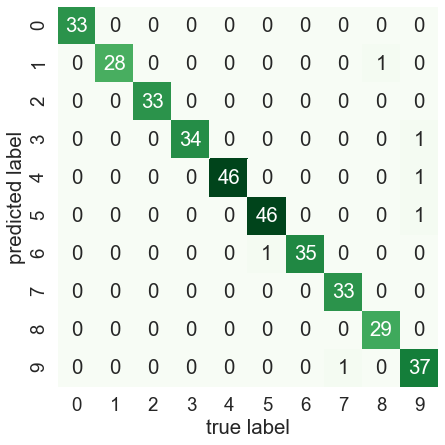

In [109]:

# Plot the confusion matrix.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.7)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names, cmap="Greens")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

# ...

Text(0.5, 1.0, '3-Class classification (k = 3)')

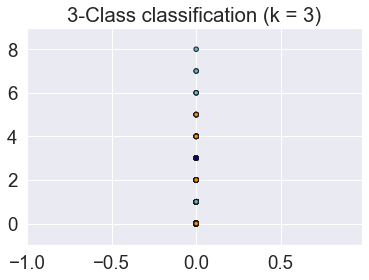

In [116]:
    # Plotagem dos pontos de treinamento
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))

# Dúvidas:

É possível mais que 98% de certeza neste exemplo? 